# Analise exploratoria dataset registros de ordem de serviço - Grupo Manutenção

In [1]:
#importação das bibliotecas e pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#lendo o arquivo do dataset e apresentando algunas registros
df = pd.read_excel('dataset_ordem_servico_gr_manut.xlsx')
df.head()

,NR_ORDEM,DS_DIA_SEMANA_OS,DT_ORDEM_SERVICO,HR_ORDEM_SERVICO,DT_FIM_REAL,HR_FIM_REAL,TP_EXECUCAO_MIN,NR_GRUPO_TRABALHO,DS_EQUIPE_ATEND,DS_TP_SETOR,NR_SEQ_ESTAGIO,DS_ESTAGIO,IE_STATUS_ORDEM,DS_STATUS,DS_PRIORIDADE,DS_TIPO
0,2216889,quinta-feira,17/03/2022,10:58:11,21/03/2022,12:00:45,5822,264,Sistema de Chaveiro,Administrativo,171,Concluída,3,Encerrado,Média,Manutenção corretiva
1,2303983,segunda-feira,04/07/2022,14:36:42,29/07/2022,10:06:10,35729,265,Sistema de Reparos em Geral,Administrativo,171,Concluída,3,Encerrado,Média,Manutenção corretiva
2,2240644,quinta-feira,07/04/2022,15:13:24,20/04/2022,15:15:41,18722,261,Sistema de Detecção de Alarme de Incêncio,Serviços Especiais,172,Cancelada,3,Encerrado,Sem prioridade,Manutenção preventiva
3,2240643,quinta-feira,07/04/2022,15:13:24,20/04/2022,15:15:28,18722,261,Sistema de Detecção de Alarme de Incêncio,Serviços Especiais,172,Cancelada,3,Encerrado,Sem prioridade,Manutenção preventiva
4,2240642,quinta-feira,07/04/2022,15:13:24,20/04/2022,15:15:06,18721,261,Sistema de Detecção de Alarme de Incêncio,Serviços Especiais,172,Cancelada,3,Encerrado,Baixa,Manutenção preventiva


In [3]:
#verificando o tamanho do dataset
df.shape

(4187, 16)

In [4]:
#verificando tipos de dados e presença de missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NR_ORDEM           4187 non-null   int64 
 1   DS_DIA_SEMANA_OS   4187 non-null   object
 2   DT_ORDEM_SERVICO   4187 non-null   object
 3   HR_ORDEM_SERVICO   4187 non-null   object
 4   DT_FIM_REAL        3722 non-null   object
 5   HR_FIM_REAL        3722 non-null   object
 6   TP_EXECUCAO_MIN    4187 non-null   int64 
 7   NR_GRUPO_TRABALHO  4187 non-null   int64 
 8   DS_EQUIPE_ATEND    4187 non-null   object
 9   DS_TP_SETOR        4187 non-null   object
 10  NR_SEQ_ESTAGIO     4187 non-null   int64 
 11  DS_ESTAGIO         4187 non-null   object
 12  IE_STATUS_ORDEM    4187 non-null   int64 
 13  DS_STATUS          4187 non-null   object
 14  DS_PRIORIDADE      4187 non-null   object
 15  DS_TIPO            4164 non-null   object
dtypes: int64(5), object(11)
memory usage: 523.

In [5]:
#verificando nome das colunas
df.columns

Index(['NR_ORDEM', 'DS_DIA_SEMANA_OS', 'DT_ORDEM_SERVICO', 'HR_ORDEM_SERVICO',
       'DT_FIM_REAL', 'HR_FIM_REAL', 'TP_EXECUCAO_MIN', 'NR_GRUPO_TRABALHO',
       'DS_EQUIPE_ATEND', 'DS_TP_SETOR', 'NR_SEQ_ESTAGIO', 'DS_ESTAGIO',
       'IE_STATUS_ORDEM', 'DS_STATUS', 'DS_PRIORIDADE', 'DS_TIPO'],
      dtype='object')

In [6]:
#retirando colunas IDs
df = df[['DS_DIA_SEMANA_OS', 'DT_ORDEM_SERVICO', 'HR_ORDEM_SERVICO', 'DT_FIM_REAL', 'HR_FIM_REAL', 'TP_EXECUCAO_MIN', 
       'DS_EQUIPE_ATEND', 'DS_TP_SETOR', 'DS_ESTAGIO', 'IE_STATUS_ORDEM', 'DS_STATUS', 'DS_PRIORIDADE', 'DS_TIPO']]

In [7]:
#incluindo conlunas de quantidade de horas de execução
df['TP_EXECUCAO_HR'] = round(df[['TP_EXECUCAO_MIN']]/60)

In [8]:
#incluindo conlunas de quantidade de dias de execução
df['TP_EXECUCAO_DIAS'] = round(df[['TP_EXECUCAO_HR']]/60)

# Analise grafica

In [32]:
df.columns

Index(['DS_DIA_SEMANA_OS', 'DT_ORDEM_SERVICO', 'HR_ORDEM_SERVICO',
       'DT_FIM_REAL', 'HR_FIM_REAL', 'TP_EXECUCAO_MIN', 'DS_EQUIPE_ATEND',
       'DS_TP_SETOR', 'DS_ESTAGIO', 'IE_STATUS_ORDEM', 'DS_STATUS',
       'DS_PRIORIDADE', 'DS_TIPO', 'TP_EXECUCAO_HR', 'TP_EXECUCAO_DIAS'],
      dtype='object')

In [49]:
#proporção de OSs por status
prop_os_status = round((df['DS_STATUS'].value_counts() * 100) / len(df))

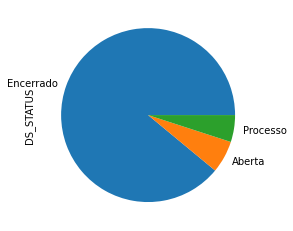

In [111]:
prop_os_status.plot(kind='pie');

In [55]:
#quantidade de OSs por dia da semana
qt_os_dias_semana = df['DS_DIA_SEMANA_OS'].value_counts()

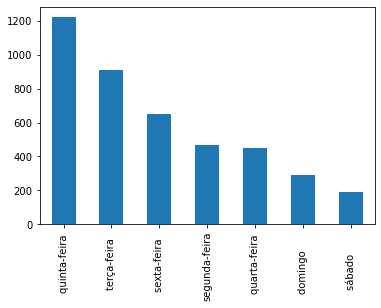

In [58]:
qt_os_dias_semana.plot(kind='bar');

In [36]:
#quantidade de OSs por equipe de atendimento
qt_os_equipe = df['DS_EQUIPE_ATEND'].value_counts()

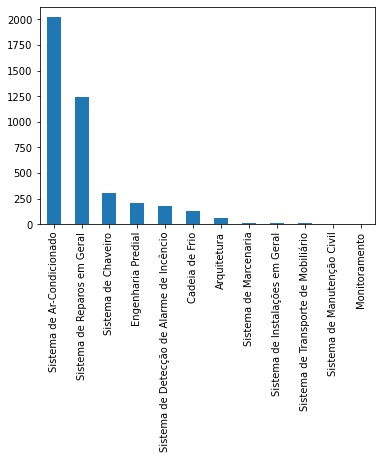

In [118]:
qt_os_equipe.plot(kind='bar');

In [70]:
df.columns

Index(['DS_DIA_SEMANA_OS', 'DT_ORDEM_SERVICO', 'HR_ORDEM_SERVICO',
       'DT_FIM_REAL', 'HR_FIM_REAL', 'TP_EXECUCAO_MIN', 'DS_EQUIPE_ATEND',
       'DS_TP_SETOR', 'DS_ESTAGIO', 'IE_STATUS_ORDEM', 'DS_STATUS',
       'DS_PRIORIDADE', 'DS_TIPO', 'TP_EXECUCAO_HR', 'TP_EXECUCAO_DIAS'],
      dtype='object')

In [71]:
#analisando a quantidade de minutos de execução de OS do equipe de atendimento que mais atendeu X menos atendeu
df2 = df[['DS_EQUIPE_ATEND', 'TP_EXECUCAO_MIN', 'TP_EXECUCAO_HR', 'TP_EXECUCAO_DIAS']]

<AxesSubplot:xlabel='DS_EQUIPE_ATEND', ylabel='TP_EXECUCAO_MIN'>

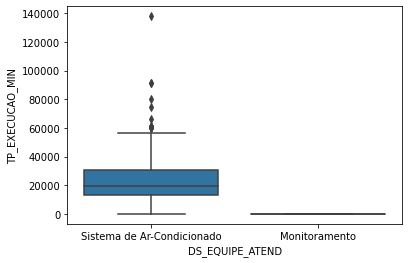

In [93]:
sns.boxplot(data=df2[df2['DS_EQUIPE_ATEND'].isin (['Sistema de Ar-Condicionado','Monitoramento'])]
                     , x='DS_EQUIPE_ATEND', y='TP_EXECUCAO_MIN')

In [102]:
#Analisando o tipo de setor que mais abriu OS para a equipe que mais atendeu
df3 = df[df['DS_EQUIPE_ATEND'] == 'Sistema de Ar-Condicionado']

In [106]:
tp_setor = df3['DS_TP_SETOR'].value_counts()

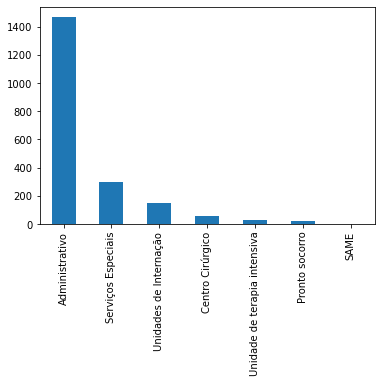

In [119]:
tp_setor.plot(kind='bar');

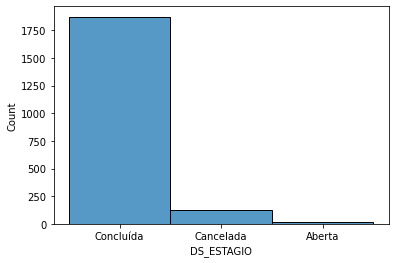

In [134]:
#analisando os estagio das OS da equipe que mais atendeu
sns.histplot(data=df3, x='DS_ESTAGIO');

In [126]:
#Analisando o tipo de setor que mais abriu OS para a equipe que menos atendeu
df4 = df[df['DS_EQUIPE_ATEND'] == 'Monitoramento']

In [127]:
tp_setor2 = df4['DS_TP_SETOR'].value_counts()

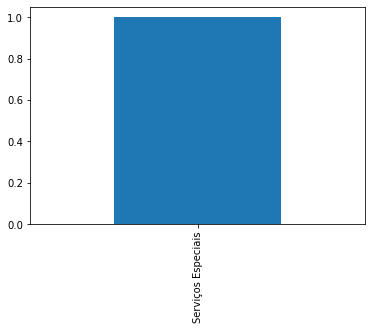

In [130]:
tp_setor2.plot(kind='bar');

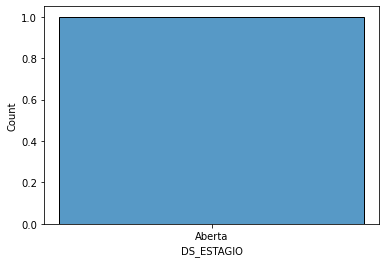

In [135]:
#analisando os estagio das OS da equipe que mais atendeu
sns.histplot(data=df4, x='DS_ESTAGIO');

# Analisando a frequencia e as quantiades das colunas DS_STATUS e DS_ESTAGIO

In [10]:
frequencia = df['DS_STATUS'].value_counts()

In [20]:
porcentual = df['DS_STATUS'].value_counts(normalize=True) * 100

In [21]:
df_status = pd.DataFrame({'frequencia': frequencia, 'porcentual': porcentual})
df_status

,frequencia,porcentual
Encerrado,3722,88.894196
Aberta,262,6.257464
Processo,203,4.848340


In [23]:
frequencia = df['DS_ESTAGIO'].value_counts()

In [24]:
porcentual = df['DS_ESTAGIO'].value_counts(normalize=True) * 100

In [28]:
df_estagio = pd.DataFrame({'frequencia': frequencia, 'porcentual': porcentual})
df_estagio.sort_index()

,frequencia,porcentual
Aberta,218,5.206592
Aguardando aprovação,1,0.023883
Aguardando atendimento,3,0.071650
Aguardando fornecedor,11,0.262718
Aguardando material,38,0.907571
Aguardando programação,3,0.071650
Cancelada,222,5.302126
Concluída,3464,82.732267
Em Análise,13,0.310485
Em atendimento,183,4.370671


In [31]:
pd.crosstab(df['DS_STATUS'], df['DS_ESTAGIO'])

DS_ESTAGIO,Aberta,Aguardando aprovação,Aguardando atendimento,Aguardando fornecedor,Aguardando material,Aguardando programação,Cancelada,Concluída,Em Análise,Em atendimento,Encaminhado,Redirecionado
DS_STATUS,,,,,,,,,,,,
Aberta,212,1,3,0,33,0,0,11,0,0,1,1
Encerrado,6,0,0,4,3,3,222,3453,0,2,0,29
Processo,0,0,0,7,2,0,0,0,13,181,0,0
